# Sistemas Inteligentes

## Laboratório 4 - Clusterização

Algoritmos de Clusterização 
- k-means
- Affinity Propagation

Aplicação em compressão de imagens



### Identificação do Aluno

#### Nome Completo

William de Souza Gomes

#### RA

11201720874

## Importação e preparação dos dados

In [130]:
%matplotlib inline

In [131]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

In [132]:
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [5, 5],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12
    }

plt.rcParams.update(params)

Carregue a base de dados IRIS, então efetue uma redução de dimensionalidade utilizando PCA com 2 componentes. Por fim, faça um Holdout dos dados para separar dados de treino e teste; utilize 20% para teste e faça o embaralhamento dos dados nesse processo.

In [133]:
df = load_iris()
X = df.data
y = df.target

In [134]:
#Dimensões
print(X.shape)
#Labels
print(df.feature_names)


(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [199]:
#Redução de dimensionalidade
pca = PCA(n_components=2)
pca = pca.fit_transform(X)

In [200]:
print(pca.shape)
X_train, X_test, y_train, y_test = tts(pca, y, test_size = .20)


(150, 2)


In [201]:
#print(X_train)
#print(X_test)

In [202]:
import pandas as pd
df_x_pd = pd.DataFrame(df.data, columns= df.feature_names)
df_y_pd = pd.DataFrame(df.target)
df_x_pd.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Clusterização 

Calcule os centróides de cada grupo (considere 3 grupos) para os dados de treino.

In [203]:
c0=[]; c1=[]; c2=[]
for i in range(y_train.shape[0]):
    if y_train[i] == 0:
        c0.append(X_train[i])
    elif y_train[i] == 1:
        c1.append(X_train[i])
    else:
        c2.append(X_train[i])
        
c0=np.array(c0)
c1=np.array(c1)
c2=np.array(c2)
        
c0_cm = np.array([np.mean(c0[:,0]), np.mean(c0[:,1])])
c1_cm = np.array([np.mean(c1[:,0]), np.mean(c1[:,1])])
c2_cm = np.array([np.mean(c2[:,0]), np.mean(c2[:,1])])

cm = np.vstack((c0_cm, c1_cm, c2_cm))

Exiba o gráfico de dispersão para os dados de treinamento com seus respectivos centróides. Lembre-se de utilizar os eixos da transformação do PCA e, também, de utilizar os valores dos alvos (y) como base para definir de qual cor será cada amostra representada no gráfico.

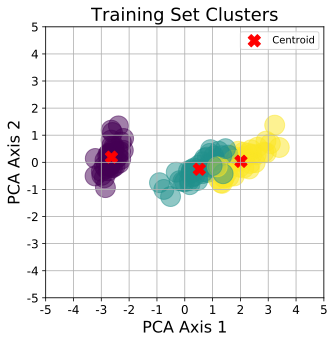

In [204]:
plt.figure()
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train, cmap='viridis', s=400, alpha=0.5)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Training Set Clusters')
plt.grid(True)

plt.scatter(x=cm[:,0], y=cm[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()
plt.show()

## Algoritmo K-MEANS

Agora crie um objeto de agrupamento com a função KMeans; utilize 3 grupos e já faça o ajuste (fit) com base nos dados de entrada de treinamento. Ainda na mesma célula, faça a predição com base nos dados de entrada de teste.

In [209]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)
y_pred = kmeans.predict(X_test)
print(y_pred)
print(y_test)
type(y_pred)

[1 1 2 0 1 1 1 0 2 1 0 0 1 2 0 2 2 2 0 0 2 0 2 1 0 2 1 0 0 1]
[1 1 2 0 1 1 1 0 2 1 0 0 1 2 0 1 2 2 0 0 2 0 2 1 0 2 1 0 0 2]


numpy.ndarray

Exiba os centróides de cada grupo (dica: há um objeto da classe kmeans para isso)

In [210]:
kmeans.cluster_centers_

array([[-2.63611633,  0.18882593],
       [ 0.69880849, -0.31957531],
       [ 2.27080158,  0.25293195]])

Mostre a inércia do modelo (dica: há um objeto da classe kmeans para isso)

In [213]:
kmeans.inertia_

48.38403540495306

Tal como havia sido feito para os dados de treinamento, exiba o gráfico de dispersão, mas agora utilizando amostras de teste e utilizando as predições do kmeans para determinar as cores de cada amostra.

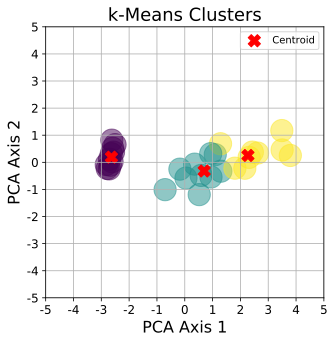

In [214]:
plt.figure()
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_pred, cmap='viridis', s=500, alpha=0.5)
#plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_pred, cmap='viridis', s=400, alpha=0.5)

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('k-Means Clusters')
plt.grid(True)

plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()
plt.show()

## Algoritmo de Propagação de Afinidade

Gere um objeto de agrupamento com AffinityPropagation e faça o ajuste com base nas entradas de treinamento.

In [247]:
AP = AffinityPropagation().fit(X_train)

Mostre os centróides dos grupos.

In [248]:
AP.cluster_centers_

array([[ 2.41939122,  0.30350394],
       [-2.54268576,  0.58628103],
       [-0.01019007, -0.72057487],
       [-2.71539062, -0.16955685],
       [ 1.52566363, -0.37502085],
       [ 1.08713449,  0.07539039]])

Mostre os índices dos grupos.

In [249]:
AP.cluster_centers_indices_

array([ 41,  43,  67,  70,  78, 107])

Faça a predição com base nos dados de entrada de teste e ostre o resultado da predição.

In [250]:
y_pred_ap = affinity.predict(X_test)

Novamente, exiba o gráfico de espalhamento das amostras de entrada, mas agora colorindo-as com base nas predições (dos grupos a que pertencem) feitas pelo algoritmo de Affinity Propagation.

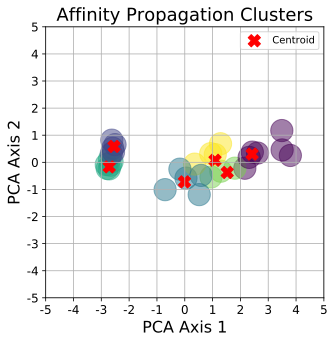

In [251]:
plt.figure()
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_pred_ap, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Affinity Propagation Clusters')
plt.grid(True)

plt.scatter(x=AP.cluster_centers_[:,0], y=AP.cluster_centers_[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()
plt.show()

## Aplicação - Compressão de Imagem

Defina a variável n_cores com a quantidade de cores desejada para a figura final, então importe uma figura (baixada do TIDIA), atribuindo-a à variável imagem. Depois, converta a figura para um array de tipo float64 com valores de 0 a 1. Por fim, exiba o formato da imagem.

In [451]:
n_cores = 90
from PIL import Image
try:  
    imagem  = Image.open('arara-1.jpg')  
except IOError: 
    pass

imagem = np.array(imagem, dtype=np.float64)
imagem = imagem/255
imagem.dtype
imagem.shape

(600, 800, 3)

Exiba a imagem

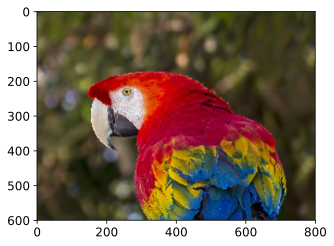

In [452]:
plt.imshow(imagem)

Modifique o formato da matriz correspondente à imagem para que a primeira dimensão refira-se à posição do pixel e a segunda dimensão refira-se à tríade de valores das camadas RGB.

In [453]:
imagem_array = np.reshape(imagem,(480000, imagem.shape[2]))
print(imagem_array)
imagem_array.shape

w, h, d = original_shape = tuple(imagem.shape)
assert d == 3
imagem_array = np.reshape(imagem, (w * h, d))

[[0.27058824 0.25490196 0.14901961]
 [0.26666667 0.25098039 0.14509804]
 [0.2627451  0.24705882 0.14117647]
 ...
 [0.23137255 0.21960784 0.09019608]
 [0.23529412 0.22352941 0.09411765]
 [0.23529412 0.22352941 0.09411765]]


Atribua à variável X uma versão "embaralhada" (shuffle) do array da imagem obtido após o reshape, mas selecione apenas os 1000 primeiros valores. Então, crie o objeto agrupador utilizando a função KMeans com o número de grupos igual ao número de cores. Por fim, efetue o ajuste com a função fit com base em X.

In [454]:
X = shuffle(imagem_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_cores, random_state=0).fit(X)


Realize uma predição com o agrupador kmeans, baseando-se no array da imagem e atribua o resultado à variável grupos.

In [464]:
grupos = kmeans.predict(imagem_array)

Agora, atribua à variavel codebook_random uma nova versão embaralhada do array da imagem, mas selecione apenas a quantidade de valores que corresponda ao número de cores definido inicialmente. Ainda nesta célula, utilize a função pairwise_distances_argmin para selecionar os grupos aleatórios que minimizam as distâncias. Dica: para esta última função, utilize como argumentos: codebook_random, imagem_array e axis=0, nesta ordem.

In [465]:
codebook_random = shuffle(imagem_array, random_state=0)[:n_cores]
labels_random = pairwise_distances_argmin(codebook_random, imagem_array, axis=0)

In [466]:
# Recria a imagem comprimida com base no Code Book e nos índices
def recria_imagem(codebook, grupos, w, h):
    d = codebook.shape[1]
    imagem = np.zeros((w, h, d))
    grupo_idx = 0
    for i in range(w):
        for j in range(h):
            imagem[i][j] = codebook[grupos[grupo_idx]]
            grupo_idx += 1
    return imagem

Utilizando uma célula para cada caso, exiba a imagem original, a imagem quantizada por K-Means e a imagem quantizada por distâncias aleatórias mínimas.

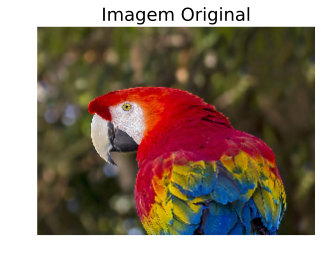

In [458]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Imagem Original')
plt.imshow(imagem)

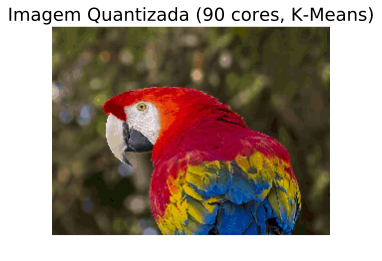

In [459]:
plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Imagem Quantizada (%d cores, K-Means)' % n_cores)
plt.imshow(recria_imagem(kmeans.cluster_centers_, grupos, w, h))

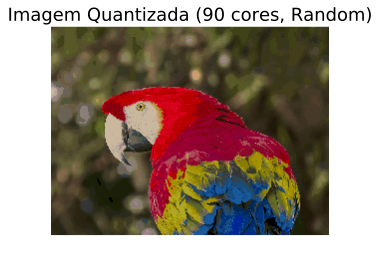

In [460]:
plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Imagem Quantizada (%d cores, Random)' % n_cores)
plt.imshow(recria_imagem(codebook_random, labels_random, w, h))
plt.show()